# 6. Revaluation and Deployment

## 6.1 Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

from sklearn.metrics import confusion_matrix

from Helpers_NN import conf_matrix
from Classification import Classification

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

C:\Users\candy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
sns.set_context('poster')

In [3]:
stacking_model = pickle.load(open('Models/Stacking.pkl','rb'))
neural_net_model = pickle.load(open('Models/Neural_Network.pkl','rb'))

Using TensorFlow backend.


In [4]:
x_test = pd.read_csv('Data/4.x_test_data.csv')
y_test = pd.read_csv('Data/4.y_test_data.csv')
x_test_array = np.load('Data/6.x_test.npy')
y_test_ohe = pd.read_csv('Data/6.y_test_ohe.csv')
y_test_nn = pd.read_csv('Data/6.y_test_nn_df.csv')
y_test_predicted_array = np.load('Data/6.y_test_predicted_array.npy')

## 6.2 Comparing Stacking Model with Neural Network Model

### 6.2.1 Test Accuracy for Stacking Model

In [5]:
stacking_model.get_test_scores(x_test,y_test)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Stacking,0.55467,0.507709,0.046961


,1,2,3,4,5
precision,0.626344,0.441667,0.417098,0.460000,0.600551
recall,0.619681,0.447887,0.428191,0.473008,0.566234
f1-score,0.622995,0.444755,0.422572,0.466413,0.582888


### 6.2.2 Test Accuracy for Neural Network Model

I tested the neural network model using the test data and achieved an accuracy of <strong>0.5710</strong> which is better than the stacking model accuracy of <strong>0.5077</strong>, by <strong>over 5%</strong>. 
    

In [6]:
neural_net_model.evaluate(x_test_array,y_test_ohe)

1881/1881 [==============================] - 0s 21us/step


[0.9799792462368712, 0.5709728598594666]

### 6.2.3 Confusion Matrix for Stacking Model

I wanted to look at the confusion matrix, as this gives a better idea of how the model is performing over all 5 classes.

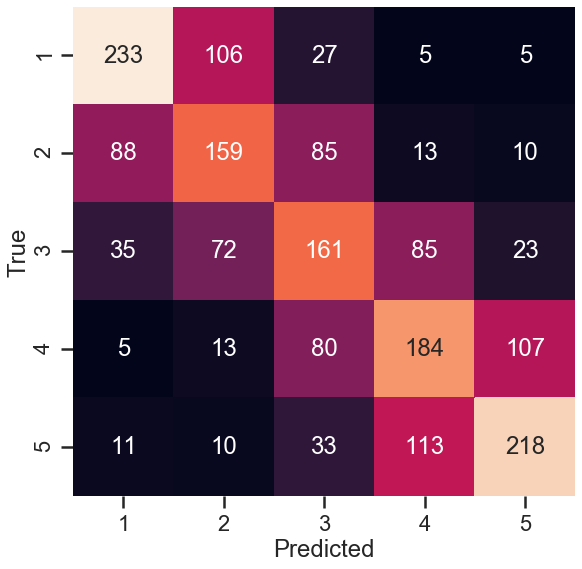

In [7]:
stacking_model.test_conf_matrix()

### 6.2.4 Confusion Matrix for Neural Network Model

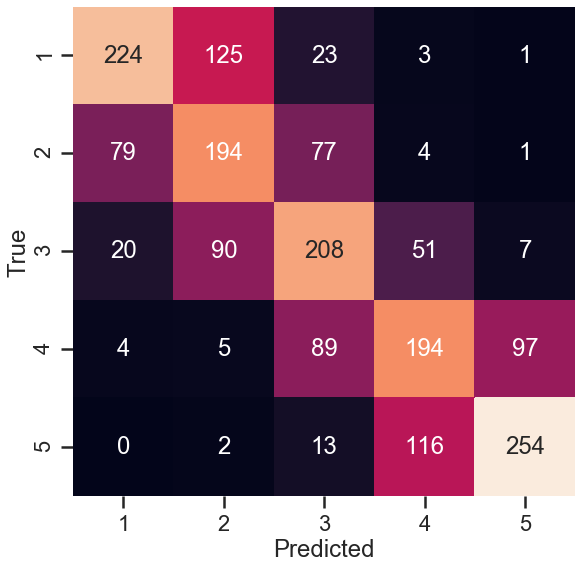

In [8]:
test_cm = confusion_matrix(y_test_nn['score'], y_test_predicted_array)
conf_matrix(test_cm)

The error is more contained in adjacent scores with the neural network model. Almost zero confusion between extreme scores 1 and 5, and minimal confusion with scores 2 and 4. Although a score of 3 can be harder to predict, there is definitely an improvement from the Stacking model.

## 6.3 Deployment